# Analysis of Data

In [2]:
#Importing all the libraries
import pandas as pd
import numpy as np
import keras
import sklearn as sk
import scipy
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn as sb
from sklearn.cluster import DBSCAN


In [10]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_excel('excercise.xlsx', sheet_name='Sheet1')

In [11]:
# Check to see if there are any missing values in our data set
df.isnull().any()

Store no                    False
Store name                  False
Country short name          False
Country name                False
latitude                    False
                            ...  
KmDist alnatura             False
KmDist costco               False
KmDist migros               False
KmDist sisa supermercato    False
KmDist spar                 False
Length: 96, dtype: bool

In [12]:
#checking the data 
df.head()

,Store no,Store name,Country short name,Country name,latitude,longitude,Street Address,Postcode,Location,Year,...,KmDist conad,KmDist simply market,KmDist coop,KmDist hyper u,KmDist netto,KmDist alnatura,KmDist costco,KmDist migros,KmDist sisa supermercato,KmDist spar
0,3080,Pöls,AT,Österreich,47.219862,14.581737,Marktplatz 20,8761.0,Pöls,2016,...,164.929236,262.527533,109.988678,626.423495,138.895438,201.733547,1139.500529,443.399543,266.490022,8.749428
1,3080,Pöls,AT,Österreich,47.219862,14.581737,Marktplatz 20,8761.0,Pöls,2017,...,164.929236,262.527533,109.988678,626.423495,138.895438,201.733547,1139.500529,443.399543,266.490022,8.749428
2,3080,Pöls,AT,Österreich,47.219862,14.581737,Marktplatz 20,8761.0,Pöls,2018,...,164.929236,262.527533,109.988678,626.423495,138.895438,201.733547,1139.500529,443.399543,266.490022,8.749428
3,3080,Pöls,AT,Österreich,47.219862,14.581737,Marktplatz 20,8761.0,Pöls,2019,...,164.929236,262.527533,109.988678,626.423495,138.895438,201.733547,1139.500529,443.399543,266.490022,8.749428
4,3086,Schwarzach,AT,Österreich,47.320710,13.147206,Salzburger Str. 30,5620.0,Schwarzach,2016,...,92.693275,218.303711,91.665871,518.124867,50.166936,99.980577,1040.264622,334.271055,199.749368,0.274233


In [13]:
# The dataset contains 96 columns and 6648 observations
df.shape

(6648, 96)

In [14]:
# Check the type of our features. 
df.dtypes

Store no                      int64
Store name                   object
Country short name           object
Country name                 object
latitude                    float64
                             ...   
KmDist alnatura             float64
KmDist costco               float64
KmDist migros               float64
KmDist sisa supermercato    float64
KmDist spar                 float64
Length: 96, dtype: object

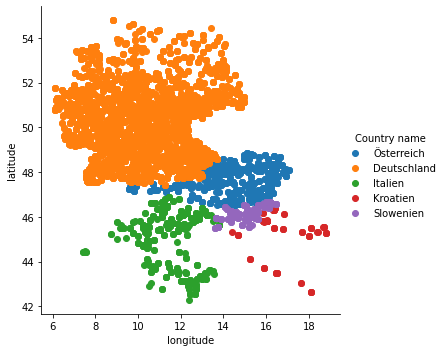

In [15]:
#plot for all the stores opened in each country
sns.lmplot(y='latitude', x='longitude', hue='Country name', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':1})

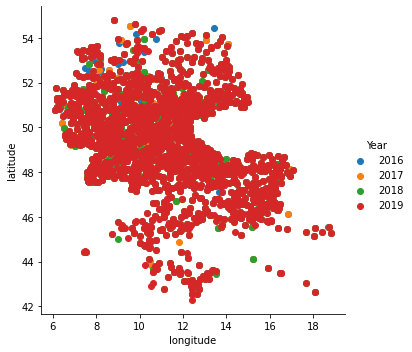

In [16]:
#Stores open yearly
sns.lmplot(y='latitude', x='longitude', hue='Year', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':1})

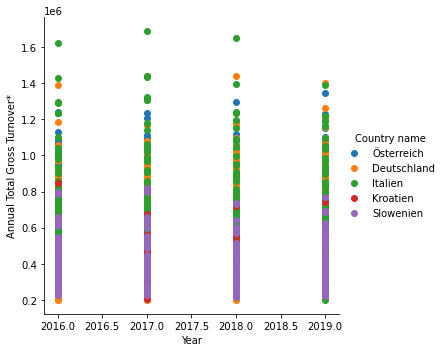

In [17]:
#Annual Gross turnover based on countries
sns.lmplot(y='Annual Total Gross Turnover*', x='Year', hue='Country name', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':1})

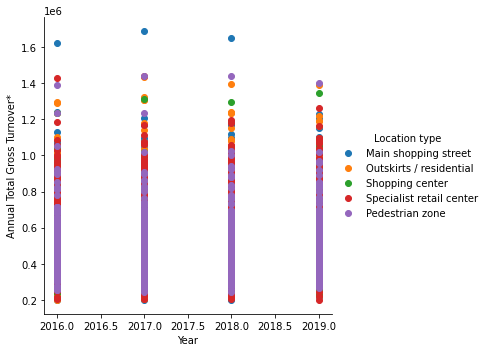

In [18]:
#Annual Gross Turnover based on location types
sns.lmplot(y='Annual Total Gross Turnover*', x='Year', hue='Location type', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':1})

In [19]:
#getting the info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Store no                                   6648 non-null   int64  
 1   Store name                                 6648 non-null   object 
 2   Country short name                         6648 non-null   object 
 3   Country name                               6648 non-null   object 
 4   latitude                                   6648 non-null   float64
 5   longitude                                  6648 non-null   float64
 6   Street Address                             6322 non-null   object 
 7   Postcode                                   6322 non-null   float64
 8   Location                                   6322 non-null   object 
 9   Year                                       6648 non-null   int64  
 10  Annual Total Gross Turno

In [20]:
#data description
df.describe()

,Store no,latitude,longitude,Postcode,Year,Annual Total Gross Turnover*,Store area (m2)*,Monthly rent*,Hours a week local stores are open,Distance to nearest NKD (Km),...,KmDist conad,KmDist simply market,KmDist coop,KmDist hyper u,KmDist netto,KmDist alnatura,KmDist costco,KmDist migros,KmDist sisa supermercato,KmDist spar
count,6648.000000,6648.000000,6648.000000,6322.000000,6648.000000,6.648000e+03,6648.000000,6322.000000,6504.000000,6648.000000,...,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000
mean,2622.846871,49.259088,11.186904,46719.607561,2017.513688,5.271689e+05,337.758870,3574.843046,54.020546,9.882755,...,327.784508,419.563174,198.154921,489.324301,49.591442,108.519259,841.672862,373.194118,455.937067,38.705677
std,1325.630792,2.201580,2.597745,33850.566792,1.120991,1.819644e+05,73.027907,1934.609843,5.961889,8.568649,...,195.618546,180.927593,139.867448,163.464316,73.267019,115.156243,226.817279,165.669093,200.753386,58.401469
min,13.000000,42.294991,6.093040,1000.000000,2016.000000,1.978624e+05,94.050000,0.000000,38.500000,0.000000,...,0.001588,0.426796,0.003180,121.409919,0.000000,0.071933,406.560441,2.764749,1.526573,0.032821
25%,1756.750000,47.939262,9.111260,8784.000000,2017.000000,3.976476e+05,293.700000,2496.000000,50.000000,4.956032,...,180.045813,301.140232,90.236492,356.793770,8.522186,29.762161,668.011232,244.405141,310.052719,7.627606
50%,2392.000000,49.247540,11.091855,44112.500000,2018.000000,4.935673e+05,335.500000,3328.000000,53.500000,8.582826,...,313.061238,422.688896,166.680978,477.727871,17.930143,68.880215,815.174701,365.669839,435.240668,19.885859
75%,3293.000000,50.898657,12.977751,79114.000000,2019.000000,6.212403e+05,383.900000,4348.083200,57.000000,12.556924,...,471.579851,556.037609,283.295987,612.918056,45.601751,133.060580,984.412220,498.099324,602.659458,40.451924
max,6101.000000,54.785687,18.800957,99974.000000,2019.000000,1.688977e+06,728.200000,36458.048000,96.000000,160.089647,...,898.366175,882.436455,644.557880,1030.631441,504.667763,744.593755,1663.142949,905.701824,1023.646964,542.189665


In [45]:
#considering the data which is important
importances=(df[['Public transport stop within 200m','Shop within 500m','Shop within 50m','Shop within 100m','Resteraunts, cafes or pubs within 500m','Resteraunts, cafes or pubs within 50m','Km dist to train station','ATM within 100m','Bank ATM within 100m','ATM within 500m','Parking spaces within 5km','Resteraunts, cafes or pubs within 5km','Shop within 5km','ATM within 5km','Bank ATM within 5km','Public transport stop within 100m','Public transport stop within 50m','Train stations within 500m','Km distance to supermarket','Supermarkets within 500m','Competitors Within 1Km','Competitors Within 5Km','Competitors Within 10Km','Within 5km HHs in 5th Income Quintile','Within 5km HHs in 4th Income Quintile','Within 5km HHs in 3rd Income Quintile','Within 5km HHs in 2nd Income Quintile','Within 5km HHs in 1st Income Quintile','Population within 5km','Households (HHs) within 5km','KmDist spar','KmDist sisa supermercato','KmDist migros','KmDist costco','KmDist alnatura','KmDist netto','KmDist hyper u','KmDist coop','KmDist simply market','KmDist conad','KmDist crai','KmDist rossmann','KmDist rewe','KmDist carrefour','KmDist kaufland','KmDist edeka','KmDist pepco','KmDist mana','KmDist action','KmDist tedi','KmDist h&m','KmDist primark','KmDist lidl','KmDist kik','KmDist ernstings family','KmDist c&a','KmDist aldi','Monthly rent*', 'Hours a week local stores are open','latitude','Household with 1km Purchasing Power Index','Population within 1km','Supermarkets within 500m','Within 1km HHs in 1st Income Quintile','Within 1km HHs in 2nd Income Quintile','Within 1km HHs in 3rd Income Quintile','Within 1km HHs in 4th Income Quintile','Within 1km HHs in 5th Income Quintile','Within 1km Population in 0-14','Within 1km Population in 30-44','Within 1km Population in 45-59','Within 1km Population in 60+']].corrwith(df['Annual Total Gross Turnover*']))
feature_list = list(df[['Public transport stop within 200m','Shop within 500m','Shop within 50m','Shop within 100m','Resteraunts, cafes or pubs within 500m','Resteraunts, cafes or pubs within 50m','Km dist to train station','ATM within 100m','Bank ATM within 100m','ATM within 500m','Parking spaces within 5km','Resteraunts, cafes or pubs within 5km','Shop within 5km','ATM within 5km','Bank ATM within 5km','Public transport stop within 100m','Public transport stop within 50m','Train stations within 500m','Km distance to supermarket','Supermarkets within 500m','Competitors Within 1Km','Competitors Within 5Km','Competitors Within 10Km','Within 5km HHs in 5th Income Quintile','Within 5km HHs in 4th Income Quintile','Within 5km HHs in 3rd Income Quintile','Within 5km HHs in 2nd Income Quintile','Within 5km HHs in 1st Income Quintile','Population within 5km','Households (HHs) within 5km','KmDist spar','KmDist sisa supermercato','KmDist migros','KmDist costco','KmDist alnatura','KmDist netto','KmDist hyper u','KmDist coop','KmDist simply market','KmDist conad','KmDist crai','KmDist rossmann','KmDist rewe','KmDist carrefour','KmDist kaufland','KmDist edeka','KmDist pepco','KmDist mana','KmDist action','KmDist tedi','KmDist h&m','KmDist primark','KmDist lidl','KmDist kik','KmDist ernstings family','KmDist c&a','KmDist aldi','Monthly rent*', 'Hours a week local stores are open','latitude','Household with 1km Purchasing Power Index','Population within 1km','Supermarkets within 500m','Within 1km HHs in 1st Income Quintile','Within 1km HHs in 2nd Income Quintile','Within 1km HHs in 3rd Income Quintile','Within 1km HHs in 4th Income Quintile','Within 1km HHs in 5th Income Quintile','Within 1km Population in 0-14','Within 1km Population in 30-44','Within 1km Population in 45-59','Within 1km Population in 60+']])

In [47]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Monthly rent*        Importance: 0.49
Variable: Hours a week local stores are open Importance: 0.33
Variable: KmDist costco        Importance: 0.23
Variable: KmDist kaufland      Importance: 0.23
Variable: Household with 1km Purchasing Power Index Importance: 0.18
Variable: Population within 1km Importance: 0.16
Variable: Within 1km HHs in 4th Income Quintile Importance: 0.16
Variable: Within 1km HHs in 5th Income Quintile Importance: 0.16
Variable: Within 1km Population in 0-14 Importance: 0.16
Variable: Within 1km Population in 30-44 Importance: 0.16
Variable: Resteraunts, cafes or pubs within 5km Importance: 0.15
Variable: Bank ATM within 5km  Importance: 0.15
Variable: Supermarkets within 500m Importance: 0.15
Variable: KmDist alnatura      Importance: 0.15
Variable: Supermarkets within 500m Importance: 0.15
Variable: Within 1km HHs in 3rd Income Quintile Importance: 0.15
Variable: Within 1km Population in 45-59 Importance: 0.15
Variable: Within 1km Population in 60+ Impo

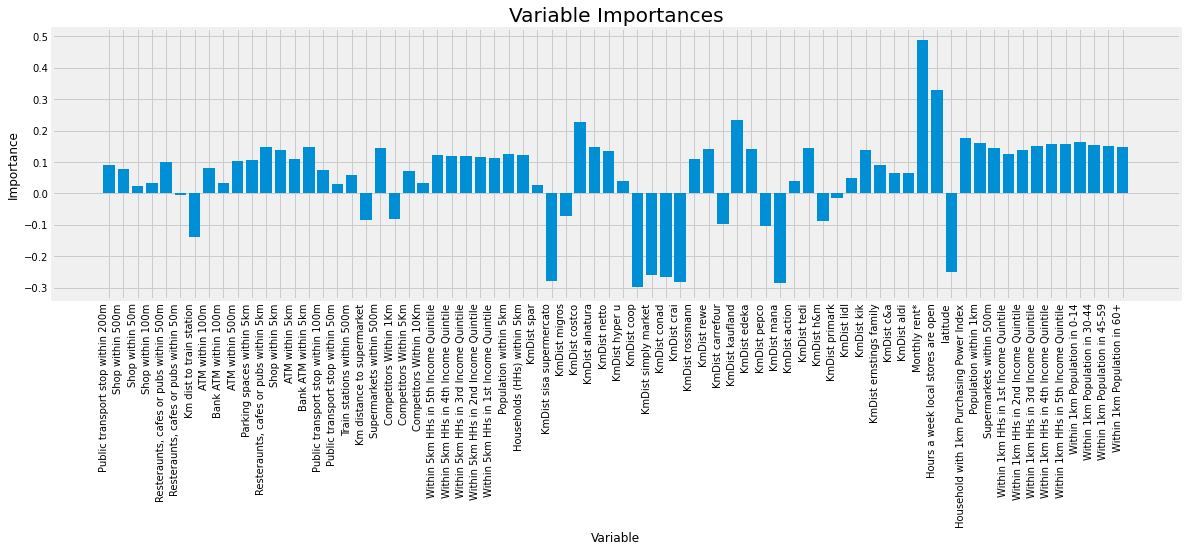

In [62]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
f, ax = plt.subplots(figsize=(18,5))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical',ha='right')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [137]:
#Top 10 important variables
top_10_importance=importances[(importances > 0.15)]

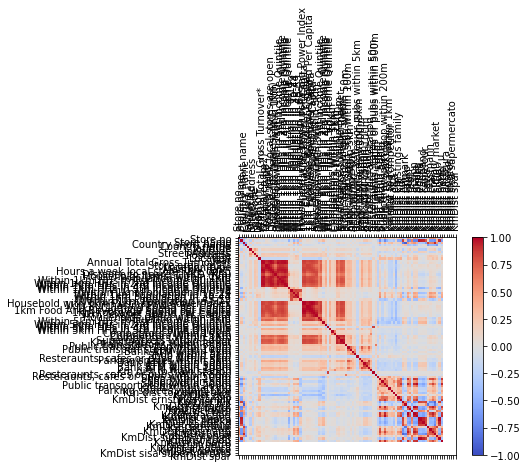

In [21]:
#checking the correlation with whole data 
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [22]:
x=np.ones_like(corr, dtype=np.bool)

In [23]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

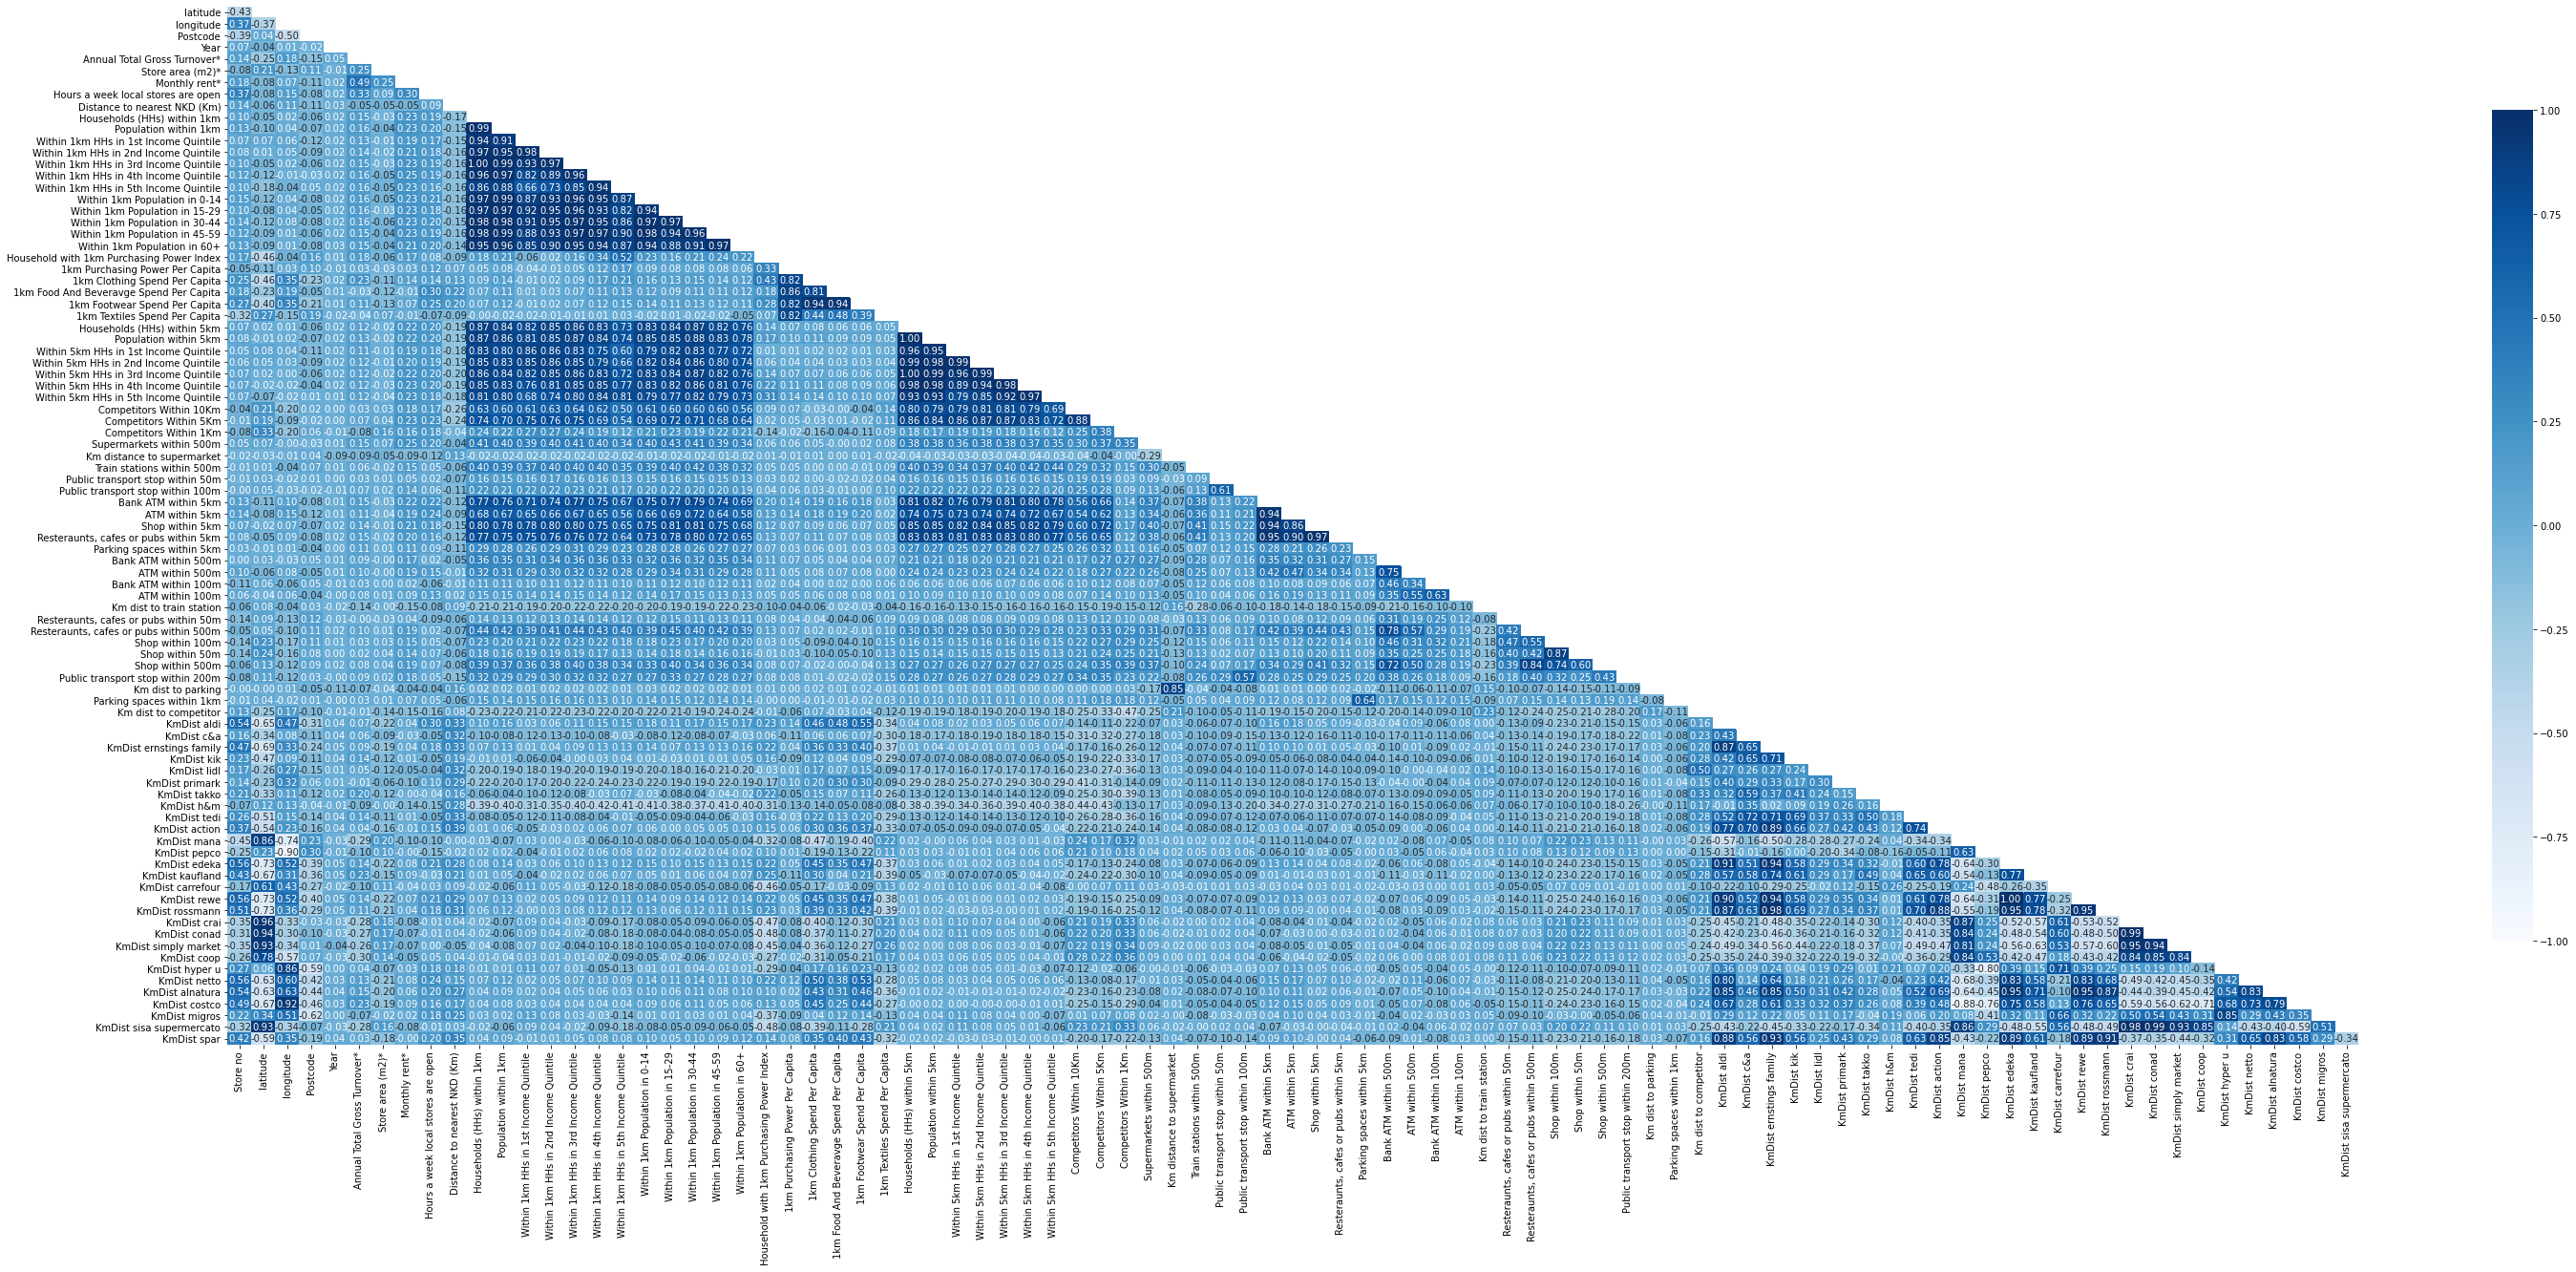

In [25]:
#Concentrating on the lower triange of correlation Matrix
fig, ax = plt.subplots(figsize=(50, 20))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()